In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Read csv file into dataframe
df = pd.read_csv('paysim.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00"
mean,243.40,"179,861.90","833,883.10","855,113.67","1,100,701.67","1,224,996.40",0.00,0.00
std,142.33,"603,858.23","2,888,242.67","2,924,048.50","3,399,180.11","3,674,128.94",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,389.57",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,871.94","14,208.00",0.00,"132,705.66","214,661.44",0.00,0.00
75%,335.00,"208,721.48","107,315.18","144,258.41","943,036.71","1,111,909.25",0.00,0.00
max,743.00,"92,445,516.64","59,585,040.37","49,585,040.37","356,015,889.35","356,179,278.92",1.00,1.00


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [5]:
# Get count of null values per cokumn
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

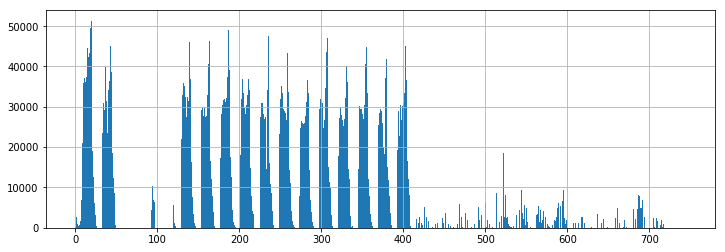

In [6]:
df['step'].hist(figsize=(12,4), bins=743)

C:\Users\19145\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'transaction count')

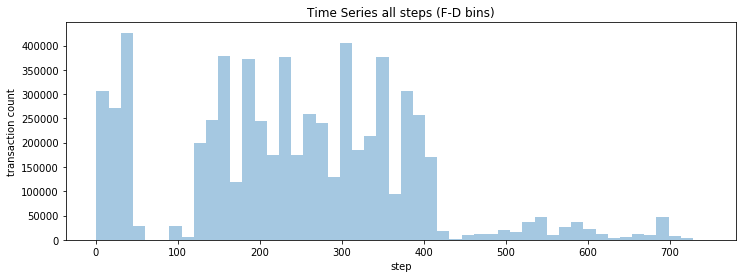

In [7]:
# Check frequency of step, which represents an hour time interval.  
# All periods have some transaction, and there is a cluster of periods with the most activity. 

plt.figure(figsize=(12,4))
sns.distplot(df.step, kde=False )
plt.title('Time Series all steps (F-D bins)')
plt.ylabel('transaction count')

Text(0, 0.5, 'transaction count')

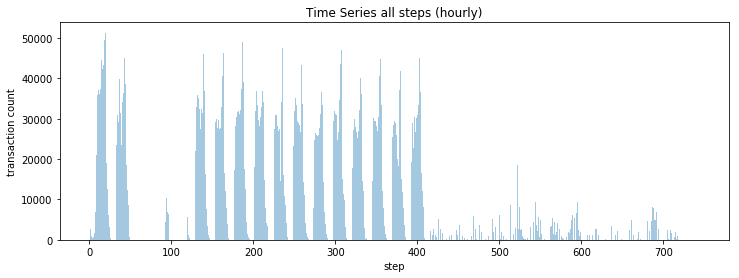

In [8]:
plt.figure(figsize=(12,4))
sns.distplot(df.step, kde=False, bins=743)
plt.title('Time Series all steps (hourly)')
plt.ylabel('transaction count')

Text(0.5, 1.0, 'Time Series isFraud=1 all steps (hourly)')

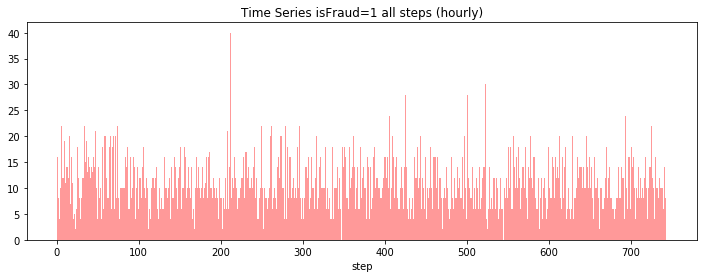

In [9]:
dffraud = df[df.isFraud == 1]
plt.figure(figsize=(12,4))
sns.distplot(dffraud.step, bins=743, kde=False, color='red')
plt.title('Time Series isFraud=1 all steps (hourly)')
#plt.ylabel('transaction count')

In [10]:
# Check the frequency stats from describe() for origin account
# The top frequency for any one account is 3
print(df['nameOrig'].describe())
print('The percentage of unique accounts is ' + '{0:,.4f}'.format((df['nameOrig'].nunique())/len(df['nameOrig'])*100) + ' or ' 
     + '{0:,.0f}'.format(len(df['nameOrig'])-df['nameOrig'].nunique()) + ' non-unique accounts out of ' + '{0:,.0f}'.format(len(df['nameOrig'])) )

count        6362620
unique       6353307
top       C545315117
freq               3
Name: nameOrig, dtype: object
The percentage of unique accounts is 99.8536 or 9,313 non-unique accounts out of 6,362,620


In [11]:
# Check the count of value zero "0" for "oldbalanceOrg" column 
zero_oldbalanceOrg = df[df.oldbalanceOrg == 0]
print('The ratio of zero values is ' + str(round(len(zero_oldbalanceOrg)/len(df['oldbalanceOrg']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_oldbalanceOrg)) + ' of ' +'{0:,.0f}'.format(len(df['oldbalanceOrg'])))

The ratio of zero values is 0.33 or 2,102,449 of 6,362,620


In [12]:
# Check the count of value zero "0" for a "newbalanceOrig" column
zero_newbalanceOrig = df[df.newbalanceOrig == 0]
print('The ratio of zero values is ' + str(round(len(zero_newbalanceOrig)/len(df['newbalanceOrig']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_newbalanceOrig)) + ' of ' +'{0:,.0f}'.format(len(df['newbalanceOrig'])))

The ratio of zero values is 0.57 or 3,609,566 of 6,362,620


In [13]:
# Check the frequency stats from describe() for destination account, 
# Note the top frequency for destination accounts is 113, several accounts are used nearly as frequently
# And the number of unique accounts is nearly half the number of transactions
print(df['nameDest'].value_counts(sort=True).head(5))
print(df['nameDest'].value_counts(sort=True).tail(5))
print(df['nameDest'].describe())
print('The percentage of unique accounts is ' + '{0:,.4f}'.format((df['nameDest'].nunique())/len(df['nameDest'])*100) + ' or ' 
     + '{0:,.0f}'.format(len(df['nameDest'])-df['nameDest'].nunique()) + ' non-unique accounts out of ' + '{0:,.0f}'.format(len(df['nameDest'])) )

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
Name: nameDest, dtype: int64
M705840138     1
M645355482     1
M756414071     1
M451279560     1
M1130052441    1
Name: nameDest, dtype: int64
count         6362620
unique        2722362
top       C1286084959
freq              113
Name: nameDest, dtype: object
The percentage of unique accounts is 42.7868 or 3,640,258 non-unique accounts out of 6,362,620


In [14]:
# Check the count of value zero "0" for "oldbalanceDest" column
zero_oldbalanceDest = df[df.oldbalanceDest == 0]
print('The ratio of zero values is ' + str(round(len(zero_oldbalanceDest)/len(df['oldbalanceDest']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_oldbalanceDest)) + ' of ' +'{0:,.0f}'.format(len(df['oldbalanceDest'])))

The ratio of zero values is 0.43 or 2,704,388 of 6,362,620


In [15]:
# Check the count of value zero "0" for "newbalanceDest" column
zero_newbalanceDest = df[df.newbalanceDest == 0]
print('The ratio of zero values is ' + str(round(len(zero_newbalanceDest)/len(df['newbalanceDest']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_newbalanceDest)) + ' of ' +'{0:,.0f}'.format(len(df['newbalanceDest'])))

The ratio of zero values is 0.38 or 2,439,433 of 6,362,620


The ratio of zero values is 0.998709 or 6,354,407 of 6,362,620
The number of isFraud cases is 8,213


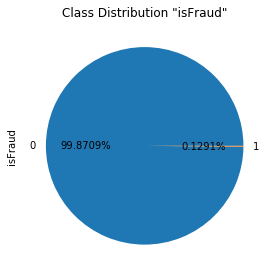

In [16]:
# Check the count of value zero "0" for "isFraud" column and show pie chart
# The zero is a boolean indicator, and represents a small percentage of the population
zero_isFraud = df[df.isFraud == 0]
print('The ratio of zero values is ' + str(round(len(zero_isFraud)/len(df['isFraud']),6)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_isFraud)) + ' of ' +'{0:,.0f}'.format(len(df['isFraud'])))
print('The number of isFraud cases is ' + '{0:,.0f}'.format(len(df['isFraud'])-len(zero_isFraud)))
df.isFraud.value_counts().plot.pie(autopct='%.4f%%')
plt.title('Class Distribution "isFraud"')
plt.tight_layout()

The ratio of zero values is 0.999997 or 6,362,604 of 6,362,620
The number of isFlaggedFraud cases is 16


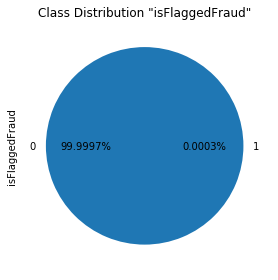

In [17]:
# Check the count of value zero "0" for "isFlaggedFraud" column
# The zero is a boolean indicator, and represents a small percentage of the population 
zero_isFlaggedFraud = df[df.isFlaggedFraud == 0]
print('The ratio of zero values is ' + str(round(len(zero_isFlaggedFraud)/len(df['isFlaggedFraud']),6)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_isFlaggedFraud)) + ' of ' +'{0:,.0f}'.format(len(df['isFlaggedFraud'])))
print('The number of isFlaggedFraud cases is ' + '{0:,.0f}'.format(len(df['isFlaggedFraud'])-len(zero_isFlaggedFraud)))
df.isFlaggedFraud.value_counts().plot.pie(autopct='%.4f%%')
plt.title('Class Distribution "isFlaggedFraud"')
plt.tight_layout()

In [18]:
# The isFraud=1 indicator coincides with the only zero amounts
zero_amount = df[df.amount == 0]
print(len(zero_amount))
zero_amount.head(20)


16


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.00,C1510987794,0.00,0.00,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.00,C521393327,0.00,0.00,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.00,C539112012,0.00,0.00,C1106468520,"538,547.63","538,547.63",1,0
5563714,387,CASH_OUT,0.00,C1294472700,0.00,0.00,C1325541393,"7,970,766.57","7,970,766.57",1,0
5996408,425,CASH_OUT,0.00,C832555372,0.00,0.00,C1462759334,"76,759.90","76,759.90",1,0
5996410,425,CASH_OUT,0.00,C69493310,0.00,0.00,C719711728,"2,921,531.34","2,921,531.34",1,0
6168500,554,CASH_OUT,0.00,C10965156,0.00,0.00,C1493336195,"230,289.66","230,289.66",1,0
6205440,586,CASH_OUT,0.00,C1303719003,0.00,0.00,C900608348,"1,328,472.86","1,328,472.86",1,0
6266414,617,CASH_OUT,0.00,C1971175979,0.00,0.00,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.00,C2060908932,0.00,0.00,C1587892888,0.00,0.00,1,0


In [19]:
#Check isFraud 20 observations
nonzero_isFraud = df[df.isFraud == 1]
nonzero_isFraud.tail(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362600,742,TRANSFER,"652,993.91",C40604503,"652,993.91",0.00,C1166857907,0.00,0.00,1,0
6362601,742,CASH_OUT,"652,993.91",C1614818636,"652,993.91",0.00,C362803701,0.00,"652,993.91",1,0
6362602,742,TRANSFER,"1,819,543.69",C2089752665,"1,819,543.69",0.00,C112833674,0.00,0.00,1,0
6362603,742,CASH_OUT,"1,819,543.69",C1039979813,"1,819,543.69",0.00,C2078394828,0.00,"1,819,543.69",1,0
6362604,742,TRANSFER,"54,652.46",C1674778854,"54,652.46",0.00,C1930074465,0.00,0.00,1,0
6362605,742,CASH_OUT,"54,652.46",C43545501,"54,652.46",0.00,C830041824,0.00,"54,652.46",1,0
6362606,742,TRANSFER,"303,846.74",C959102961,"303,846.74",0.00,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,"303,846.74",C1148860488,"303,846.74",0.00,C846260566,"343,660.89","647,507.63",1,0
6362608,742,TRANSFER,"258,355.42",C1226129332,"258,355.42",0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,"258,355.42",C1113162093,"258,355.42",0.00,C797688696,"25,176.67","283,532.09",1,0


In [20]:
#Check isFraud all 16 observations
nonzero_isFlaggedFraud = df[df.isFlaggedFraud == 1]
nonzero_isFlaggedFraud.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,"4,953,893.08",C728984460,"4,953,893.08","4,953,893.08",C639921569,0.00,0.00,1,1
3247297,250,TRANSFER,"1,343,002.08",C1100582606,"1,343,002.08","1,343,002.08",C1147517658,0.00,0.00,1,1
3760288,279,TRANSFER,"536,624.41",C1035541766,"536,624.41","536,624.41",C1100697970,0.00,0.00,1,1
5563713,387,TRANSFER,"4,892,193.09",C908544136,"4,892,193.09","4,892,193.09",C891140444,0.00,0.00,1,1
5996407,425,TRANSFER,"10,000,000.00",C689608084,"19,585,040.37","19,585,040.37",C1392803603,0.00,0.00,1,1
5996409,425,TRANSFER,"9,585,040.37",C452586515,"19,585,040.37","19,585,040.37",C1109166882,0.00,0.00,1,1
6168499,554,TRANSFER,"3,576,297.10",C193696150,"3,576,297.10","3,576,297.10",C484597480,0.00,0.00,1,1
6205439,586,TRANSFER,"353,874.22",C1684585475,"353,874.22","353,874.22",C1770418982,0.00,0.00,1,1
6266413,617,TRANSFER,"2,542,664.27",C786455622,"2,542,664.27","2,542,664.27",C661958277,0.00,0.00,1,1
6281482,646,TRANSFER,"10,000,000.00",C19004745,"10,399,045.08","10,399,045.08",C1806199534,0.00,0.00,1,1


In [21]:
df718 = df[df.step > 718]
print(df718.describe())
df718notfraud = df718[df718.isFraud == 0]
print(len(df718notfraud))

        step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count 296.00        296.00         296.00          296.00          296.00   
mean  731.14  1,584,333.91   2,369,483.14      862,820.86      457,659.57   
std     7.06  2,767,853.81   6,633,547.40    4,975,757.99    1,466,041.41   
min   719.00          0.00           0.00            0.00            0.00   
25%   726.00    119,143.75     119,143.75            0.00            0.00   
50%   731.00    338,364.14     338,364.14            0.00            0.00   
75%   737.00  1,314,660.84   1,314,660.84            0.00      161,406.82   
max   743.00 10,000,000.00  57,316,255.05   47,316,255.05   11,436,080.11   

       newbalanceDest  isFraud  isFlaggedFraud  
count          296.00   296.00          296.00  
mean     1,210,990.71     1.00            0.01  
std      2,538,268.75     0.00            0.10  
min              0.00     1.00            0.00  
25%              0.00     1.00            0.00  
50%         

In [22]:
pd.to_datetime(df['step'][0])

Timestamp('1970-01-01 00:00:00.000000001')

In [23]:
df['steptime'] = df['step'].apply(lambda x: pd.to_datetime(x, unit='h'))
dffraud['steptime'] = dffraud['step'].apply(lambda x: pd.to_datetime(x, unit='h'))
dffraud.head()

C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,steptime
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1970-01-01 01:00:00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0,1970-01-01 01:00:00
251,1,TRANSFER,"2,806.00",C1420196421,"2,806.00",0.00,C972765878,0.00,0.00,1,0,1970-01-01 01:00:00
252,1,CASH_OUT,"2,806.00",C2101527076,"2,806.00",0.00,C1007251739,"26,202.00",0.00,1,0,1970-01-01 01:00:00
680,1,TRANSFER,"20,128.00",C137533655,"20,128.00",0.00,C1848415041,0.00,0.00,1,0,1970-01-01 01:00:00


In [24]:
print(df.steptime.describe())
print(dffraud.steptime.describe())

count                 6362620
unique                    743
top       1970-01-01 19:00:00
freq                    51352
first     1970-01-01 01:00:00
last      1970-01-31 23:00:00
Name: steptime, dtype: object
count                    8213
unique                    741
top       1970-01-09 20:00:00
freq                       40
first     1970-01-01 01:00:00
last      1970-01-31 23:00:00
Name: steptime, dtype: object


In [25]:
df.step.describe()

count   6,362,620.00
mean          243.40
std           142.33
min             1.00
25%           156.00
50%           239.00
75%           335.00
max           743.00
Name: step, dtype: float64

In [26]:
df.steptime.dt.weekday_name.head()

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: steptime, dtype: object

In [27]:
df['dayofweek'] = pd.Categorical(df['steptime'].dt.weekday_name,
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dffraud['dayofweek'] = pd.Categorical(dffraud['steptime'].dt.weekday_name,
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
df['timeofday'] = df['steptime'].dt.hour + df['steptime'].dt.minute / 60
dffraud['timeofday'] = dffraud['steptime'].dt.hour + dffraud['steptime'].dt.minute / 60

C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


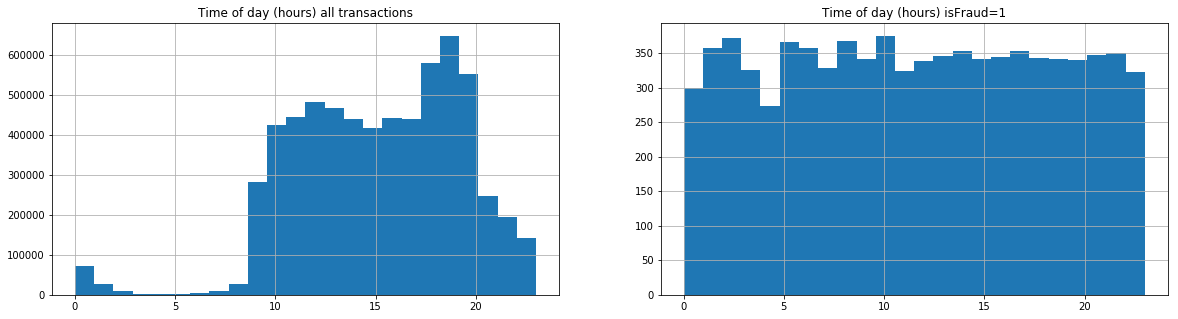

In [29]:
fig, ax = plt.subplots( 1,2, figsize=(20,5))
ax[0].set_title("Time of day (hours) all transactions")
df.timeofday.hist(bins=24, ax=ax[0])
ax[1].set_title("Time of day (hours) isFraud=1")
dffraud.timeofday.hist(bins=24, ax=ax[1])

In [30]:
df.dayofweek.value_counts()

Thursday     1528439
Friday       1308093
Tuesday       898274
Wednesday     857603
Saturday      854364
Sunday        527873
Monday        387974
Name: dayofweek, dtype: int64

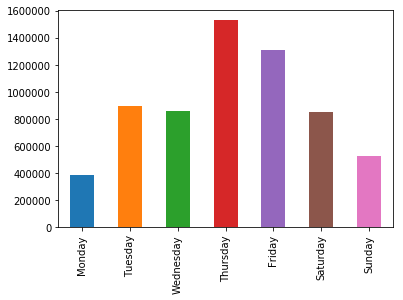

In [31]:
counts = df.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

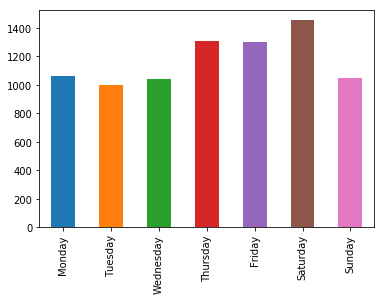

In [32]:
counts_f = dffraud.dayofweek.value_counts(sort=False)
counts_f.plot(kind='bar')

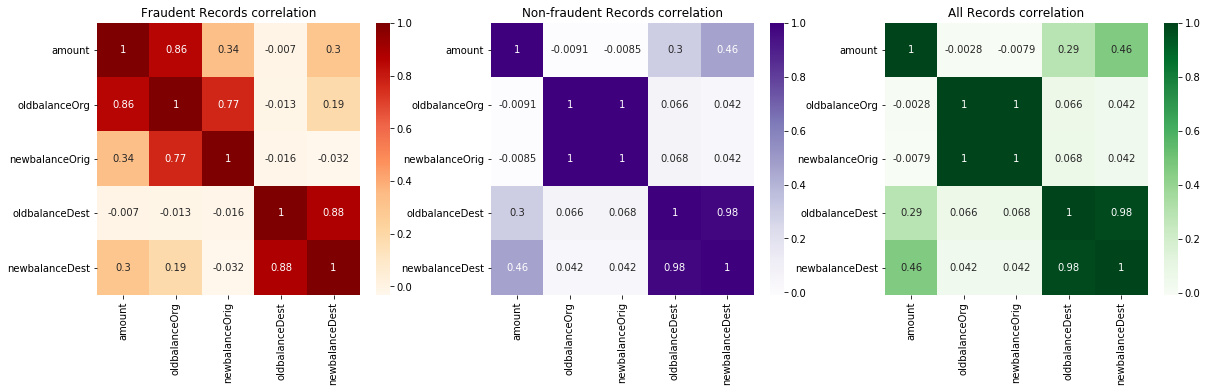

In [33]:
fig, ax = plt.subplots( 1,3, figsize=(20,5))

ax[0].set_title("Fraudent Records correlation")
sns.heatmap(df.query('isFraud == 1').drop(['isFraud', 'isFlaggedFraud', 'timeofday', 'step'],1).corr(),  cmap="OrRd", ax=ax[0], annot=True)
#sns.heatmap(df.query('isFraud == 1').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="OrRd", ax=ax[0], annot=True)

ax[1].set_title("Non-fraudent Records correlation")
#sns.heatmap(df.drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="Purples", ax=ax[1], annot=True)
sns.heatmap(df.query('isFraud == 0').drop(['isFraud', 'isFlaggedFraud', 'timeofday', 'step'],1).corr(),  cmap="Purples", ax=ax[1], annot=True)
#sns.heatmap(df.query('isFraud == 0').drop(['isFraud', 'isFlaggedFraud'],1).corr(),  cmap="Purples", ax=ax[1], annot=True)

ax[2].set_title("All Records correlation")
sns.heatmap(df.drop(['isFraud', 'isFlaggedFraud', 'timeofday', 'step'],1).corr(),  cmap="Greens", ax=ax[2], annot=True)
#sns.heatmap(df.drop(['isFraud', 'isFlaggedFraud', 'stepcount', 'timeofday', 'step'],1).corr(), annot=True, ax=ax[2])
#sns.heatmap(df.drop(['isFraud', 'isFlaggedFraud'],1).corr(), ax=ax[2], annot=True)
plt.show()

Text(0, 0.5, 'Target (Fraud = 1, Not Fraud=0)')

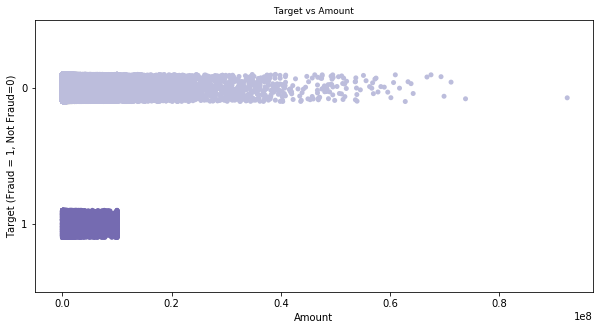

In [34]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df["amount"], y=df['isFraud'].astype('category'),
             palette=['#bcbddc','#756bb1']);
plt.title('Target vs Amount', fontsize=9)
plt.xlabel('Amount',)
plt.ylabel('Target (Fraud = 1, Not Fraud=0)',)

In [35]:
#sns.pairplot(df, kind="scatter")

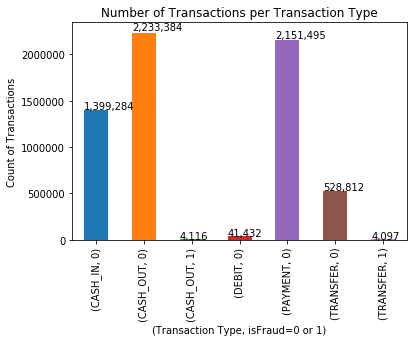

In [36]:
g = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
g.set_title("Number of Transactions per Transaction Type")
g.set_xlabel("(Transaction Type, isFraud=0 or 1)")
g.set_ylabel("Count of Transactions")

for p in g.patches:
    plt.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))